In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 读取 Excel 文件
average_file = "../../output/5_3/average.xlsx"  # 请替换为你的实际路径
io_file = "../../output/5_3/io.xlsx"  # 请替换为你的实际路径

average_df = pd.read_excel(average_file, index_col=0)
io_df = pd.read_excel(io_file, index_col=0)

# 处理数据，将可能的字符串数值转换为浮点型
def clean_numeric_values(df):
    return df.map(lambda x: float(str(x).split()[0]) if pd.notna(x) and isinstance(x, str) else x)

# 清理数据
average_df = clean_numeric_values(average_df)
io_df = clean_numeric_values(io_df)

# 获取 x 轴（第一行的数字）和方法名（第一列的五个方法）
x_labels = average_df.columns.astype(str)
methods = average_df.index

print(average_df)

                  18     19     20     21      22      23      24       25  \
Method                                                                       
RTopK          0.691  0.697  0.879  0.776   0.657   0.702   0.878    0.778   
AirTopK        0.281  0.412  0.644  1.044   1.859   3.811   7.807   15.817   
FaissTopK      1.417  2.533  4.143  6.785  12.971  30.087  74.618  148.997   
RadixDrTopK    0.349  0.583  0.947  1.676   3.019   5.532  10.772   21.140   
BitonicDrTopK    NaN    NaN    NaN    NaN     NaN     NaN     NaN      NaN   

                    26       27       28       29     30     31     32  
Method                                                                  
RTopK            0.688    0.732    0.935    0.822  0.665  0.708  0.909  
AirTopK         32.044   65.187  136.182  262.198    NaN    NaN    NaN  
FaissTopK      297.113  598.817      NaN      NaN    NaN    NaN    NaN  
RadixDrTopK     41.351   82.438  163.701      NaN    NaN    NaN    NaN  
BitonicDrTopK  

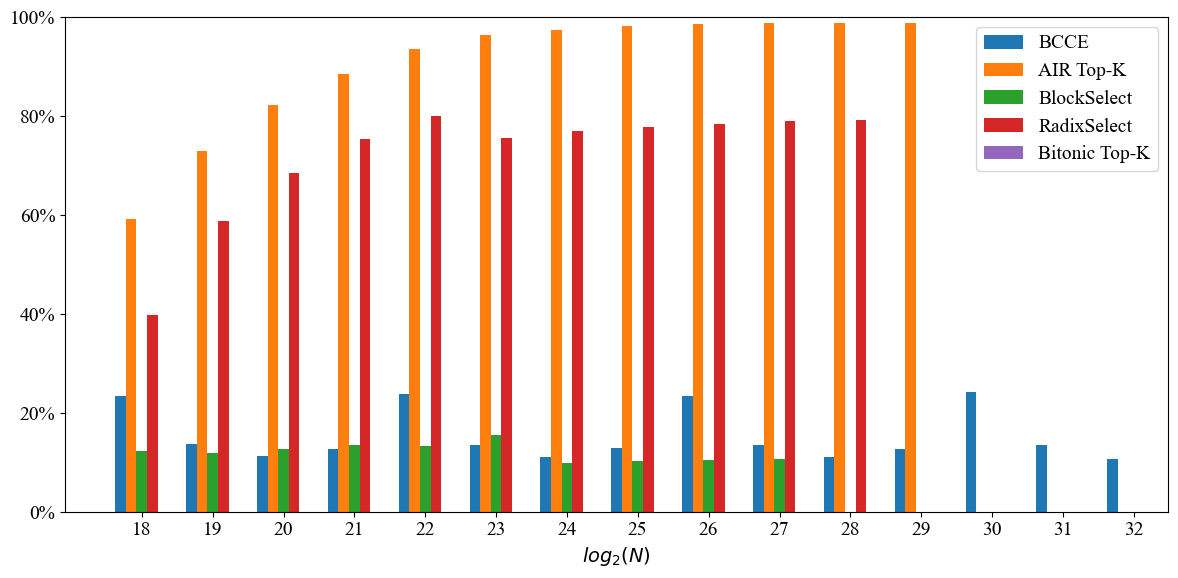

In [13]:
from matplotlib import rcParams
from matplotlib.ticker import FuncFormatter
rcParams["font.size"] = 14
rcParams["figure.figsize"] = (8, 6)  # 更窄的宽度和更高的高度
rcParams["font.family"] = "Times New Roman"

# 设置柱状图参数
bar_width = 0.15  # 每个方法的柱宽
x_columns = np.arange(len(x_labels))  # x 轴位置

# 颜色定义
method_names = ["BCCE", "Air Top-K",  "BlockSelect", "RadixSelect", "Bitonic Top-K"]
colors = ["blue", "green", "orange", "purple", "brown"]  # 不同方法的颜色

# 绘图
fig, ax = plt.subplots(figsize=(12, 6))

bar_width = 0.15
index = np.arange(len(x_columns))

# 遍历每个方法（假设你有5个方法）
for i, method in enumerate(methods):
    # 获取该方法在横坐标下的数据
    io_times = io_df.iloc[i, x_columns].values
    avg_times = average_df.iloc[i, x_columns].values
    
    # 计算 IO 时间占总时间的百分比
    percentages = (io_times / avg_times) * 100
       
    # 排除 NULL 值
    percentages = np.nan_to_num(percentages, nan=np.nan)
    
    # 绘制柱状图
    ax.bar(index + i * bar_width, percentages, bar_width, label=method_names[i])

# 图例和标签
ax.set_xlabel('Time Points', fontsize=14)
ax.set_xlabel(r'$log_{2}(N)$', fontsize=14)
ax.set_xticks(index + bar_width * (len(methods) - 1) / 2)
ax.set_xticklabels([str(io_df.columns[col]) for col in x_columns]) 


# 设置图例
ax.legend(loc='upper right')

# 设置纵坐标范围
ax.set_ylim(0, 100)

def format_percent(x, pos):
    return f"{int(x)}%"

ax.yaxis.set_major_formatter(FuncFormatter(format_percent))

# 显示图表
plt.tight_layout()
plt.savefig("5_3_io.pdf")
